In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np

# Tensor

- Three attributes: `data`, `grad` and `grad_fn`
- `requires_grad=True` means track all operations on it, and `.backward()` will update gradients automatically. The arrtibute `.grad` stores the gradients of the tensor.
- `.detach()` detaches the tensor from computation history. When **evaluating the model**, `with torch.no_grad():` block is useful to prevent updating tensors with `requires_grad=True`.

In [2]:
x = torch.ones((2, 2))
print(x)
print(x.requires_grad)

# set requires_grad=True inplace
x.requires_grad_(True)

print(x.grad_fn)

print('='*10)

# y is created by an operation
y = torch.add(x, 2)
print(y)
print(y.requires_grad)
print(y.grad_fn)

out = torch.mean(y)
out.backward()
print(x.grad)

tensor([[ 1.,  1.],
        [ 1.,  1.]])
False
None
tensor([[ 3.,  3.],
        [ 3.,  3.]])
True
tensor([[ 0.2500,  0.2500],
        [ 0.2500,  0.2500]])


# torch.nn.functional

In [3]:
x = np.linspace(-3, 3, 100)

# convert numpy array to tensor
x = torch.from_numpy(x)

print('x size:', x.size())
print('reshape x size:', x.view(2, -1).size())

# convert tensor to numpy array
x_data = x.data.numpy()

# relu 
y_relu = F.relu(x).data.numpy()
# leaky relu
y_leaky_relu = F.leaky_relu(x, negative_slope=0.1).data.numpy()
# sigmoid
y_sigmoid = F.sigmoid(x).data.numpy()
# tanh
y_tanh = F.tanh(x).data.numpy()

x size: torch.Size([100])
reshape x size: torch.Size([2, 50])


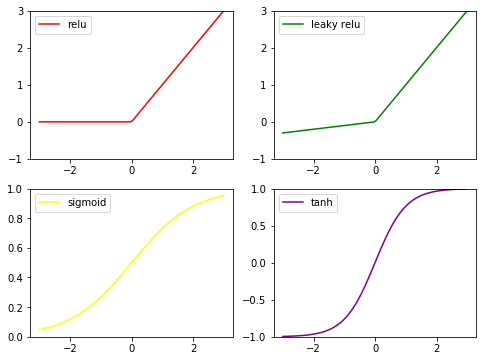

In [4]:
plt.figure(1, figsize=(8, 6))

plt.subplot(221)
plt.plot(x_data, y_relu, c='red', label='relu')
plt.ylim(-1, 3)
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_data, y_leaky_relu, c='green', label='leaky relu')
plt.ylim(-1, 3)
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_data, y_sigmoid, c='yellow', label='sigmoid')
plt.ylim(0, 1)
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_data, y_tanh, c='purple', label='tanh')
plt.ylim(-1, 1)
plt.legend(loc='best')